In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re

In [4]:
# Load the dataset
df = pd.read_excel('E:\Final_project\Retail_Transaction_Dataset.xlsx')

In [5]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


# Exploratory Data Analysis (EDA) for Customer Segmentation:

#### Q1. What is the distribution of customers across different demographic segments? (e.g., age, gender, location)



In [7]:
# Convert the 'Transaction Date' column to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract Year, Month, Day, and Week
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Week'] = df['TransactionDate'].dt.isocalendar().week

# Extract time of day and categorize into Morning, Noon, Evening, and Night
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = df['TransactionDate'].dt.hour
df['Time of Day'] = df['Hour'].apply(get_time_of_day)

# Drop the 'Hour' column as it's not needed
df = df.drop(columns=['Hour'])

In [8]:
# Function to extract state
def extract_state(StoreLocation):
    # Regex to match state which is two uppercase letters followed by a 5-digit zip code
    match = re.search(r'\b([A-Z]{2}) \d{5}\b', StoreLocation)
    if match:
        return match.group(1)
    return None

# Apply the function to add a new 'State' column
df['State'] = df['StoreLocation'].apply(extract_state)

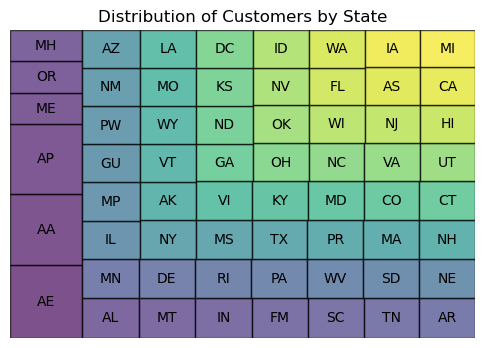

In [9]:
# Aggregate customer data by state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'customers']

# Plot the tree map
plt.figure(figsize=(6, 4))
squarify.plot(sizes=state_counts['customers'], label=state_counts['State'], alpha=0.7, color=sns.color_palette('viridis', len(state_counts)), edgecolor='black')
plt.title('Distribution of Customers by State')
plt.axis('off')
plt.show()

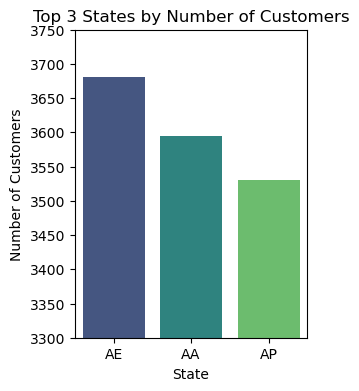

In [10]:
# Top N states
top_n = 3
top_states = df['State'].value_counts().nlargest(top_n)

plt.figure(figsize=(3, 4))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title(f'Top {top_n} States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.ylim(3300,3750)
plt.show()


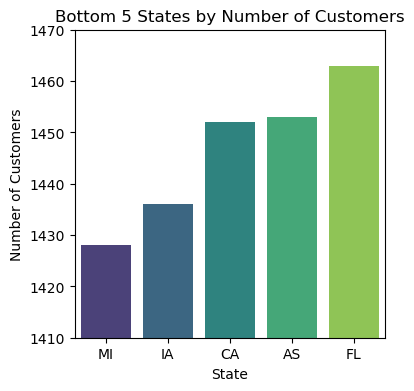

In [11]:
# Set the number of states to display
bottom_n = 5
bottom_states = df['State'].value_counts().nsmallest(bottom_n)

plt.figure(figsize=(4,4))
sns.barplot(x=bottom_states.index, y=bottom_states.values, palette="viridis")
plt.title(f'Bottom {bottom_n} States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.ylim(1410,1470)
plt.show()

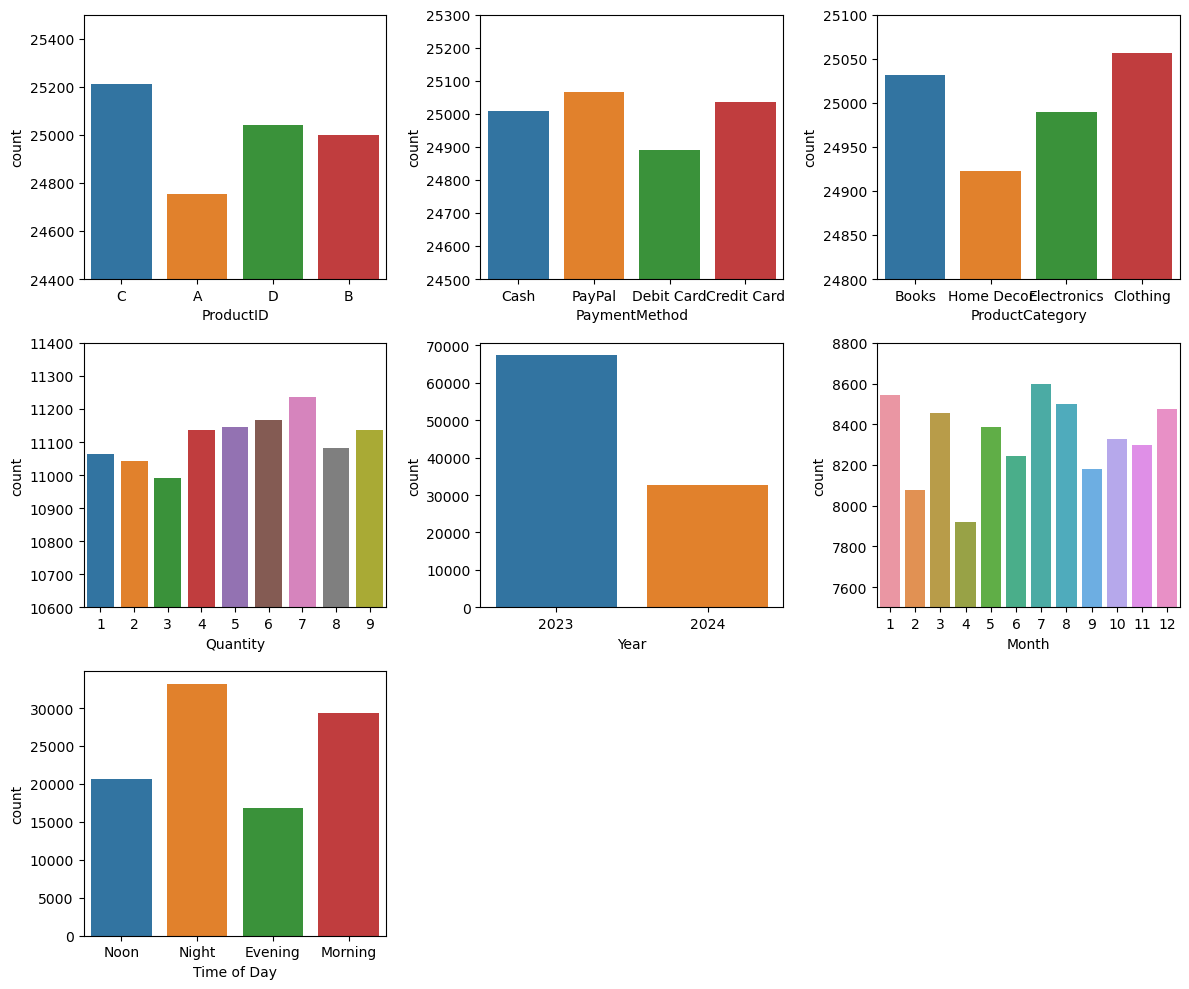

In [12]:
plt.figure(figsize=(12, 10))

# Existing count plots
plt.subplot(3, 3, 1)
sns.countplot(x='ProductID', data=df)
plt.ylim(24400, 25500)  

plt.subplot(3, 3, 2)
sns.countplot(x='PaymentMethod', data=df)
plt.ylim(24500, 25300)  

plt.subplot(3, 3, 3)
sns.countplot(x='ProductCategory', data=df)
plt.ylim(24800, 25100)  

plt.subplot(3, 3, 4)
sns.countplot(x='Quantity', data=df)
plt.ylim(10600, 11400)  

# New count plots
plt.subplot(3, 3, 5)
sns.countplot(x='Year', data=df)

plt.subplot(3, 3, 6)
sns.countplot(x='Month', data=df)
plt.ylim(7500, 8800) 

plt.subplot(3, 3, 7)
sns.countplot(x='Time of Day', data=df)

plt.tight_layout()
plt.show()

Key Insights:

1. Product ID: Product C is the most popular, followed closely by D and B. Product A has the lowest customer count.
2. Payment Method: PayPal is the most preferred payment method, followed by Credit Card. Debit Card is the least used.
3. Product Category: Clothing is the most purchased category, with Books coming in second. Home Decor has the lowest customer count.
4. Quantity: There's a slight upward trend in customer count as quantity increases, with 7 items being the most common purchase quantity.
5. Year: 2023 shows significantly higher customer counts compared to 2024. This could be due to incomplete data for 2024 if the current year is still ongoing.
6. Month: June (month 6) has the highest customer count, while February (month 2) has the lowest. There's some seasonality visible, with higher counts in summer months.
7. Time of Day: Night has the highest customer count, followed by Morning. Evening has the lowest count.





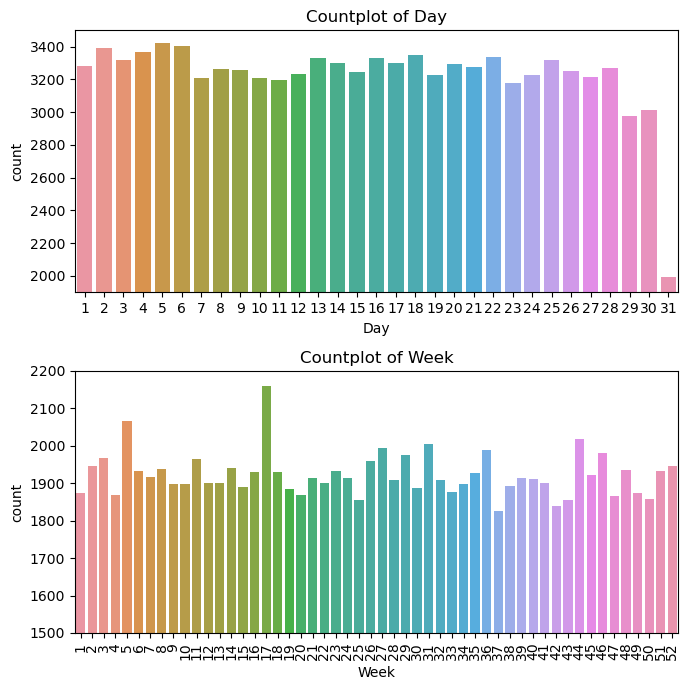

In [73]:
plt.figure(figsize=(7, 7))

# Count plot for Day
plt.subplot(2, 1, 1)
sns.countplot(x='Day', data=df)
plt.title('Countplot of Day')
plt.ylim(1900,3500)
plt.xlabel('Day')

# Count plot for Week
plt.subplot(2, 1, 2)
sns.countplot(x='Week', data=df)
plt.title('Countplot of Week')
plt.ylim(1500,2200)
plt.xlabel('Week')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Key Insight:
1. The slight dip at month-end in the daily plot might indicate pay cycle influences on customer behavior.
2. The spike in week 17 could be related to a holiday, promotion, or other significant event.

C:\Users\Dell\AppData\Local\Temp\ipykernel_12880\54957611.py:16: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


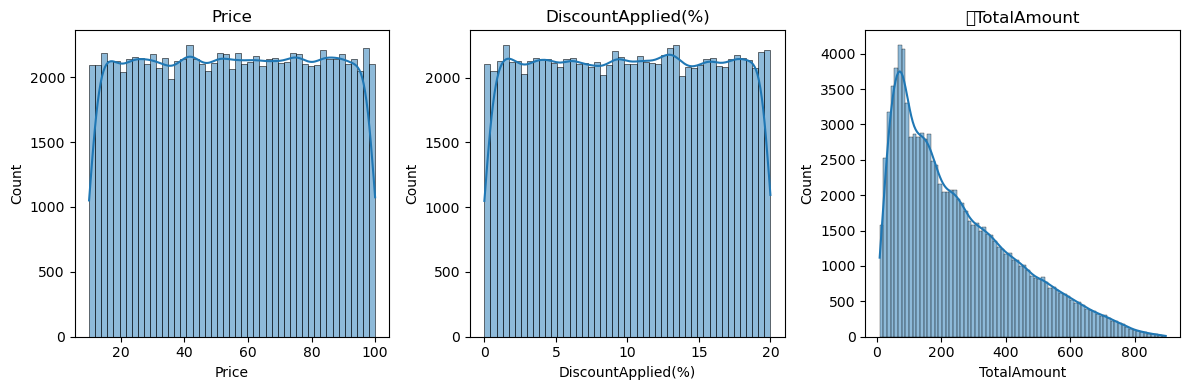

In [14]:
# Create histograms for each column using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
sns.histplot(df['Price'], kde=True)
plt.title('Price')

plt.subplot(1,3,2)
sns.histplot(df['DiscountApplied(%)'], kde=True)
plt.title('DiscountApplied(%)')

plt.subplot(1,3,3)
sns.histplot(df['TotalAmount'], kde=True)
plt.title('	TotalAmount')

plt.tight_layout()
plt.show()

Key Insights:
1. Most transactions have lower total amounts (under 200) and it shows a strong right-skewed distribution
2. Most prices fall between 20 and 80, and the distribution is relatively uniform, with a slight peak around 50-60.
3. Discounts range from 0% to 20% and the distribution is fairly uniform.

#### Q2. Can you identify any patterns or trends in purchase behaviour based on customer segments?

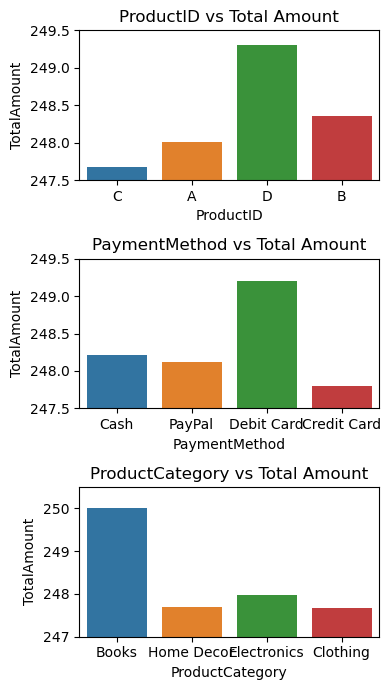

In [15]:
# Plotting using Seaborn
plt.figure(figsize=(4, 7))

# Plot for ProductID vs TotalAmount
plt.subplot(3, 1, 1)
sns.barplot(x='ProductID', y='TotalAmount', data=df, errorbar=None)
plt.title('ProductID vs Total Amount')
plt.ylim(247.5,249.5)

# Plot for PaymentMethod vs TotalAmount
plt.subplot(3, 1, 2)
sns.barplot(x='PaymentMethod', y='TotalAmount', data=df, errorbar=None)
plt.title('PaymentMethod vs Total Amount')
plt.ylim(247.5,249.5)

# Plot for ProductCategory vs TotalAmount
plt.subplot(3, 1, 3)
sns.barplot(x='ProductCategory', y='TotalAmount', data=df, errorbar=None)
plt.title('ProductCategory vs Total Amount')
plt.ylim(247,250.5)

plt.tight_layout()
plt.show()

Key Insights:

1. Products with ID 'D' have a slighltly higher total amount.
2. Total amount paid by Debit Card was slightly higher.
3. Books were brought slightly more than others items.

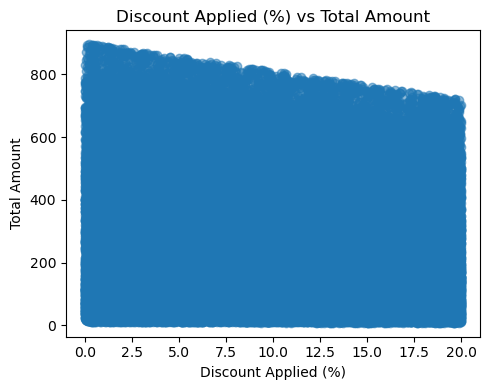

In [16]:
# Create a figure with subplots
plt.figure(figsize=(5, 4))

plt.scatter(df['DiscountApplied(%)'], df['TotalAmount'], alpha=0.5)
plt.title('Discount Applied (%) vs Total Amount')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

Key Insights:

1. Negative Correlation: There's a slight negative correlation between discount percentage and total amount, indicating that as discounts increase, total amounts tend to decrease.

2. High-Value Transactions: The highest total amounts (around 800) occur at lower discount percentages (0-5%), suggesting that high-value items or bulk purchases may receive smaller discounts.

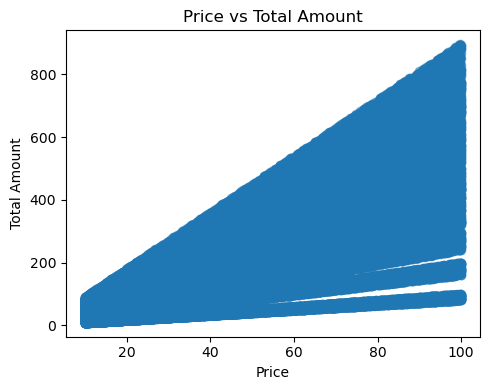

In [17]:
plt.figure(figsize=(5,4))

plt.scatter(df['Price'], df['TotalAmount'], alpha=0.5)
plt.title('Price vs Total Amount')
plt.xlabel('Price')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

Key Insights:

A strong positive correlation between price and total amount spent, with distinct lines indicating varying quantities of items purchased. Prices range consistently from 10 to 100 dollars.

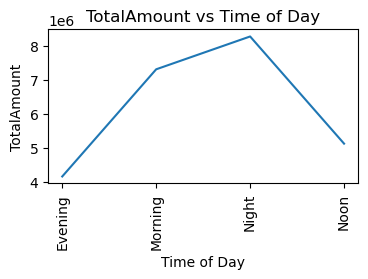

In [18]:
## Line plot of TotalAmount vs Time of Day
plt.figure(figsize=(4, 2))
time_totals = df.groupby('Time of Day')['TotalAmount'].sum().reset_index()
time_totals = time_totals.sort_values('Time of Day')
plt.plot(time_totals['Time of Day'], time_totals['TotalAmount'])
plt.xlabel('Time of Day')
plt.ylabel('TotalAmount')
plt.title('TotalAmount vs Time of Day')
plt.xticks(rotation=90)
plt.show()

Key Insights:

There's a clear upward trend from Evening through Morning to Night, followed by a sharp decline to Noon.

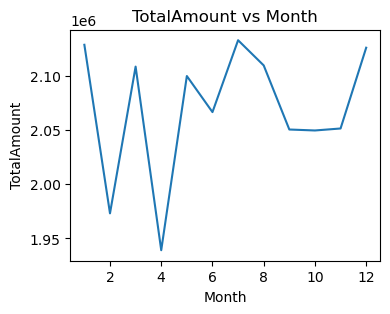

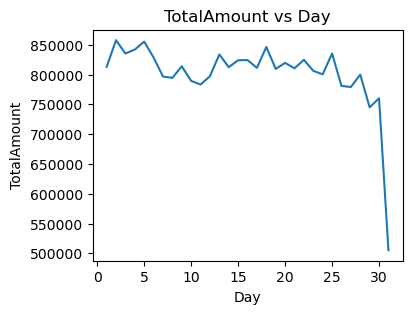

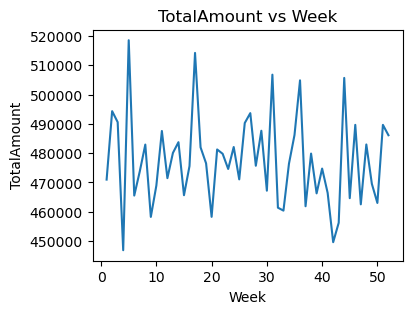

In [69]:

## Line plot of TotalAmount vs Month
plt.figure(figsize=(4, 3))
monthly_totals = df.groupby('Month')['TotalAmount'].sum().reset_index()
plt.plot(monthly_totals['Month'], monthly_totals['TotalAmount'])
plt.xlabel('Month')
plt.ylabel('TotalAmount')
plt.title('TotalAmount vs Month')
plt.show()

## Line plot of TotalAmount vs Day
plt.figure(figsize=(4, 3))
daily_totals = df.groupby('Day')['TotalAmount'].sum().reset_index()
plt.plot(daily_totals['Day'], daily_totals['TotalAmount'])
plt.xlabel('Day')
plt.ylabel('TotalAmount')
plt.title('TotalAmount vs Day')
plt.show()

## Line plot of TotalAmount vs Week
plt.figure(figsize=(4,3))
weekly_totals = df.groupby('Week')['TotalAmount'].sum().reset_index()
plt.plot(weekly_totals['Week'], weekly_totals['TotalAmount'])
plt.xlabel('Week')
plt.ylabel('TotalAmount')
plt.title('TotalAmount vs Week')
plt.show()

Key Insights:

1. The graph shows fluctuations in total amount over 52 weeks (1 year). The values range roughly between 450,000 and 520,000. There are frequent peaks and troughs, suggesting weekly variability in the total amount.

2. The total amount starts around 800,000 and generally declines over the month, with some fluctuations. There's a sharp drop at the end of the period, with the total amount falling to about 500,000.

3. The total amount fluctuates between about 1.95 million and 2.15 million throughout the year. There are notable dips in months 2 and 4, and peaks in months 1, 7, and 12.
    

#### Q3. How do customer segments differ in terms of average purchase frequency, basket size, and total spending?

In [20]:
# Calculate metrics for each segment
segment_metrics = df.groupby(['ProductID', 'PaymentMethod', 'ProductCategory']).agg(
    PurchaseFrequency=('CustomerID', 'count'),
    AverageBasketSize=('ProductCategory', 'size'),
    TotalSpending=('TotalAmount', 'sum'),
    DiscountAppliedPercentage=('DiscountApplied(%)', 'mean')  # Calculate mean discount percentage
).reset_index()

# Normalize the basket size by purchase frequency
segment_metrics['AverageBasketSize'] = segment_metrics['AverageBasketSize'] / segment_metrics['PurchaseFrequency']

# Display the segment metrics
segment_metrics.head()


,ProductID,PaymentMethod,ProductCategory,PurchaseFrequency,AverageBasketSize,TotalSpending,DiscountAppliedPercentage
0,A,Cash,Books,1500,1.0,381277.059576,10.178696
1,A,Cash,Clothing,1556,1.0,383343.803952,10.117967
2,A,Cash,Electronics,1567,1.0,393910.361385,10.058806
3,A,Cash,Home Decor,1546,1.0,394393.440487,9.933823
4,A,Credit Card,Books,1558,1.0,390720.899742,9.993209


In [21]:
segment_metrics.describe()

,PurchaseFrequency,AverageBasketSize,TotalSpending,DiscountAppliedPercentage
count,64.000000,64.0,64.000000,64.000000
mean,1562.500000,1.0,388023.367287,10.020429
std,36.159699,0.0,11676.877043,0.148028
min,1444.000000,1.0,350406.001881,9.748748
25%,1546.000000,1.0,381022.286780,9.928118
50%,1565.000000,1.0,389468.439477,10.018686
75%,1582.000000,1.0,397371.880888,10.111756
max,1628.000000,1.0,411967.074036,10.596092


#### Q4. Are there any correlations between customer segments and specific product categories or brands?

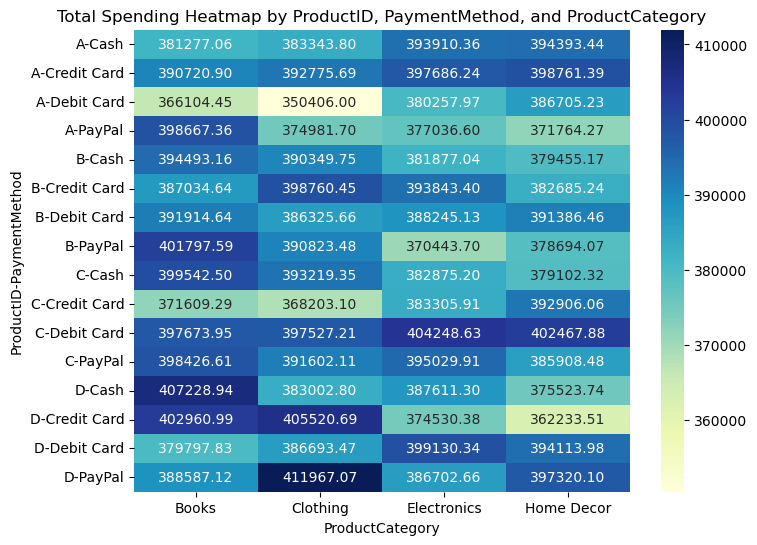

In [22]:
# Pivoting the dataframe to create a heatmap suitable format
heatmap_data = segment_metrics.pivot_table(index=['ProductID', 'PaymentMethod'], columns='ProductCategory', values='TotalSpending', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Total Spending Heatmap by ProductID, PaymentMethod, and ProductCategory')
plt.show()

Key Insights:

1. Highest Spending: The highest spending ($411,967.07) is for the D-PayPal-Clothing combination, followed by D-Cash-Books and C-Debit Card-Electronics.

2. Lowest Spending: The lowest spending ($350,406.00) is for A-Debit Card-Clothing, and D-Credit Card-Home Decor also shows relatively low spending.

3. Product ID Patterns: Product ID D exhibits both very high and low spending areas, while A tends to have lower spending overall, especially with Debit Card. B and C show more consistent spending across categories and payment methods.

4. Payment Method Trends: Credit Card and PayPal often correlate with higher spending, while Debit Card frequently shows lower spending, with some exceptions.

5. Product Category Insights: Books generally show consistent, moderate to high spending, Clothing has high variability, and Electronics and Home Decor tend to be in the mid-range.

6. Consistency vs. Variability: Some combinations (like B-PayPal) show high variability across product categories, while others (like A-Credit Card) are more consistent.

7. Specific Observations: A-Debit Card consistently underperforms across all product categories, D-PayPal shows high performance in Clothing but average in other categories, and C-Debit Card performs well across all categories.

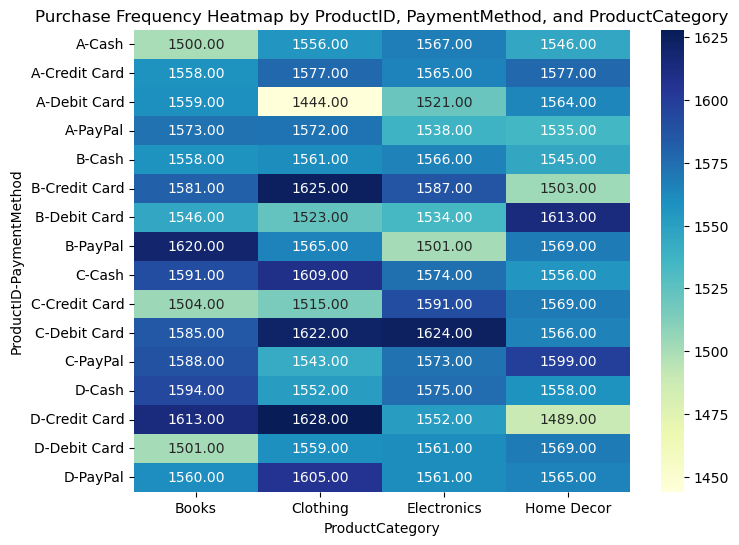

In [23]:
# Pivoting the dataframe to create a heatmap suitable format
heatmap_data = segment_metrics.pivot_table(index=['ProductID', 'PaymentMethod'], columns='ProductCategory', values='PurchaseFrequency', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Purchase Frequency Heatmap by ProductID, PaymentMethod, and ProductCategory')
plt.show()

Key Insights:

1. Highest Frequency: The highest purchase frequency (1,628) is for D-Credit Card-Clothing, followed by B-Credit Card-Clothing (1,625) and C-Debit Card-Electronics (1,624).
2. Lowest Frequency: The lowest frequency (1,444) is for A-Debit Card-Clothing, and D-Credit Card-Home Decor also shows a relatively low frequency (1,489).
3. Product ID Patterns: Product ID C exhibits consistently high frequencies across most categories and payment methods, while A tends to have lower frequencies, especially with Debit Card.
4. Payment Method Trends: Credit Card generally shows higher purchase frequencies across most Product IDs and Categories, while Debit Card performance varies significantly.
5. Product Category Insights: Clothing shows high variability in frequency, Electronics tends to have consistently high frequencies, and Books and Home Decor show more moderate frequencies.
6. Consistency vs. Variability: Some combinations (like C-Debit Card) show high consistency across product categories, while others (like D-Credit Card) exhibit high variability.
7. Specific Observations: B-Credit Card performs exceptionally well in Clothing but poorly in Home Decor, C-Debit Card shows high frequencies across all categories, and A-PayPal has relatively consistent frequencies.


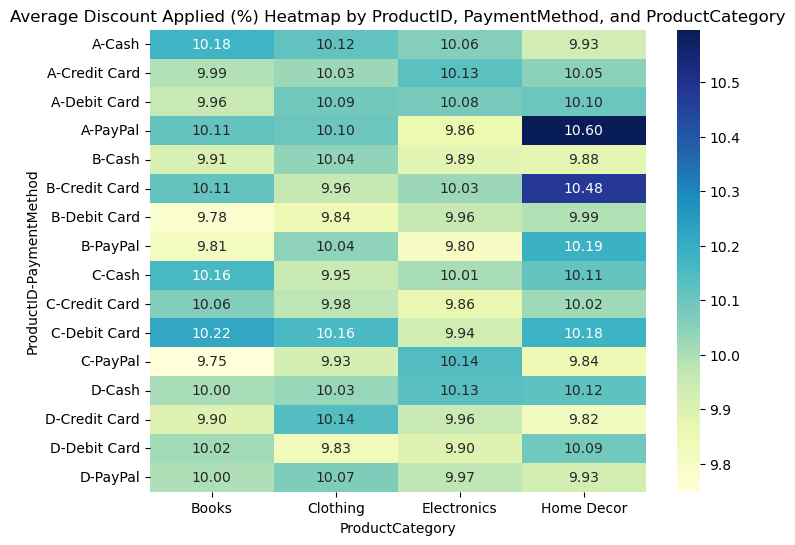

In [24]:
# Pivoting the dataframe to create a heatmap suitable format for DiscountAppliedPercentage
heatmap_data_discount = segment_metrics.pivot_table(index=['ProductID', 'PaymentMethod'], columns='ProductCategory', values='DiscountAppliedPercentage', aggfunc='mean')

# Creating the heatmap for DiscountAppliedPercentage
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_discount, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Discount Applied (%) Heatmap by ProductID, PaymentMethod, and ProductCategory')
plt.show()

Key Insights: 

1. Discounts range from 9.75% to 10.60%, with most falling between 9.8% and 10.2%.
2. Highest discount (10.60%): A-PayPal for Home Decor.
3. Lowest discount (9.75%): C-PayPal for Books.
4. No clear consistent pattern across product categories or payment methods, suggesting tailored discount strategies.
5. Notable high discounts include B-Credit Card for Home Decor (10.48%) and C-Debit Card for Books (10.22%).
6. Notable low discounts include B-Debit Card for Clothing (9.84%) and D-Credit Card for Home Decor (9.82%).

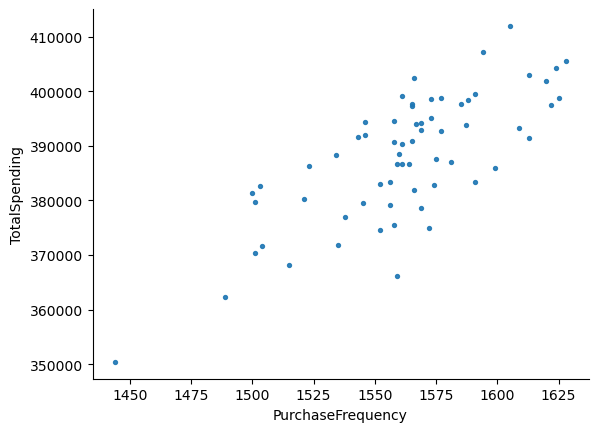

In [25]:
segment_metrics.plot(kind='scatter', x='PurchaseFrequency', y='TotalSpending', s=8, alpha=.9)
plt.gca().spines[['top', 'right',]].set_visible(False)

Key Insight:

Some high-frequency combinations show high total spending, but high frequency doesn't always correlate with high spending, suggesting variations in average transaction value.

# Recommendations and Actionable Insights:

#### a. Based on the segmentation analysis, what recommendations can be made to tailor marketing strategies or product offerings to each segment?

##### Price-Sensitive Shoppers:

Strategy: Offer higher discounts in the 15-20% range on lower-priced items.
Additional Tactics: Bundle complementary products to increase total order value while maintaining overall value.

##### High-Spending Customers:

Strategy: Implement a loyalty program with exclusive perks such as priority access to new products, personalized shopping assistance, or dedicated customer service lines.
Additional Tactics: Enhance engagement and reinforce relationships with tailored experiences.

##### Bulk Buyers:

Strategy: Implement tiered discounts offering progressively better per-unit pricing with increased quantities.
Additional Tactics: Offer specialized bulk packaging options to streamline their purchasing process.

##### Category Specialists:

Strategy: Highlight complementary items from other categories through strategic bundling or unique promotions.
Additional Tactics: Encourage exploration and discovery of new favorites.

##### Customers with Strong Payment Preferences:

Strategy: Introduce incentives such as slight discounts for using their preferred payment method.
Additional Tactics: Ensure seamless and rewarding payment experiences.

#### b. How will you track and measure the effectiveness of segmentation-based initiatives over time?

##### Key Metrics:

Track average order value, purchase frequency, and overall revenue trends for each segment.
Monitor customer behavior shifts, discount redemption rates, and satisfaction levels.

##### Experimentation:

Use A/B testing to experiment with different approaches within each segment.
Identify and scale the most effective strategies rapidly.

#### c. Are there any potential limitations or biases in the segmentation approach that need to be addressed?

The current model may overlook important demographic factors, seasonal patterns, or nuanced customer preferences and lifestyles.
Address these limitations by integrating more comprehensive customer data and maintaining flexibility in segmentation approaches.
Assumption of Causation:

There is a risk of assuming causation rather than merely correlating factors.
Regularly validate strategies and observe how they resonate with customers.
Data Completeness:

2023 shows significantly higher customer counts compared to 2024, possibly due to incomplete data for the current year.
Continuously update and validate data to ensure accuracy.
Seasonality and Trends:

Monitor seasonal trends, such as higher customer counts in summer months and peaks during specific times of day.
Adjust strategies to align with these patterns and optimize engagement.

# Model Selection and Training:

#### a. What forecasting models will be considered for predicting future sales performance?

I will consider the following forecasting models for predicting future sales performance:
1. **ARIMA (AutoRegressive Integrated Moving Average)**: A classical time series forecasting method that can handle seasonality and trends in the data.
2. **Decision Tree Regressor**: A machine learning model that splits the data into decision nodes based on feature values and makes predictions. 
3. **Random Forest Regressor**: An ensemble learning method that combines multiple decision trees to improve prediction accuracy and control over-fitting.

#### b. How will the dataset be split into training and testing sets for model evaluation?

I will split the dataset into training and testing sets as follows:
- **Training Set**: 80% of the data will be used to train the models. 
- **Testing Set**: 20% of the data will be used to test the models and evaluate their performance.

This 80/20 split ensures the models are trained on a substantial portion of the data while still reserving enough data for a robust evaluation of their predictive capabilities on unseen data.

# Model Evaluation and Validation:

#### a. What evaluation metrics will be used to assess the performance of the forecasting models?

I will use the following evaluation metrics to assess the performance of the forecasting models:
1. **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values. It is sensitive to outliers.
   ```python
   mse = mean_squared_error(y_test, y_pred)
   print(f'Mean Squared Error: {mse:.6f}')
   ```
2. **R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
   ```python
   r2 = r2_score(y_test, y_pred)
   print(f'R-squared: {r2:.6f}')
   ```

#### b. How will the accuracy and reliability of the forecasts be validated, particularly for longer-term forecasts?

To validate the accuracy and reliability of the forecasts, especially for longer-term forecasts, I will employ the following methods:

1. **Out-of-Sample Testing**: By splitting the data into training and testing sets, I can compare the models' predictions against actual values in the test set to assess their performance.
2. **Visual Inspection**: Plot the actual vs. predicted values to visually inspect the model's performance and check for systematic deviations.


In [26]:
categorical_cols = ['PaymentMethod','ProductCategory','ProductID','Quantity','Year','Month']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [27]:
from sklearn.preprocessing import MinMaxScaler
# Select numeric columns to scale
numeric_cols = ['Price','DiscountApplied(%)','TotalAmount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [28]:
df_encoded.drop(['CustomerID','State','StoreLocation','TransactionDate', 'Day', 'Week', 'Time of Day'], axis=1,inplace=True)

In [29]:
# Identify the boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert boolean columns to 0 and 1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded

,Price,DiscountApplied(%),TotalAmount,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0.778670,0.933874,0.504116,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.724396,0.706082,0.281610,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.239207,0.797201,0.229472,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.987566,0.334322,0.510290,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.924324,0.201507,0.695775,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.511982,0.917276,0.093828,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
99996,0.872411,0.199779,0.564954,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
99997,0.693177,0.871217,0.259969,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
99998,0.628250,0.717265,0.311656,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Separate features and target variable
X = df_encoded[[col for col in df_encoded.columns if col != 'TotalAmount']]
y = df_encoded['TotalAmount']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict TotalAmount on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.6f}')
print(f'R-squared: {r2:.6f}')

Mean Squared Error: 0.000001
R-squared: 0.999969


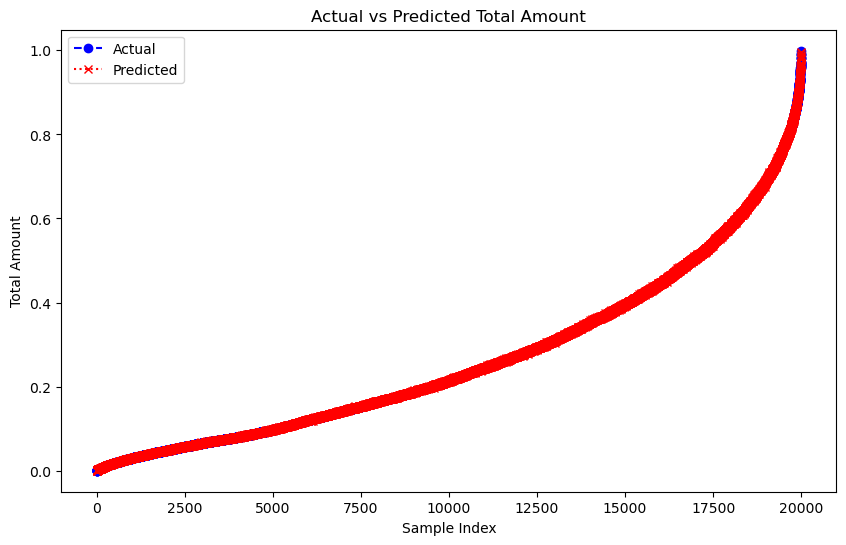

In [65]:
# Plot y_test and y_pred
plt.figure(figsize=(10, 6))

# Sort the values for better visualization
sorted_idx = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = np.array(y_pred)[sorted_idx]

plt.plot(y_test_sorted, label='Actual', color='blue', marker='o', linestyle='dashed')
plt.plot(y_pred_sorted, label='Predicted', color='red', marker='x', linestyle='dotted')

plt.xlabel('Sample Index')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Total Amount')
plt.legend()
plt.show()


In [67]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict TotalAmount on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.6f}')
print(f'R-squared: {r2:.6f}')

Mean Squared Error: 0.000006
R-squared: 0.999854


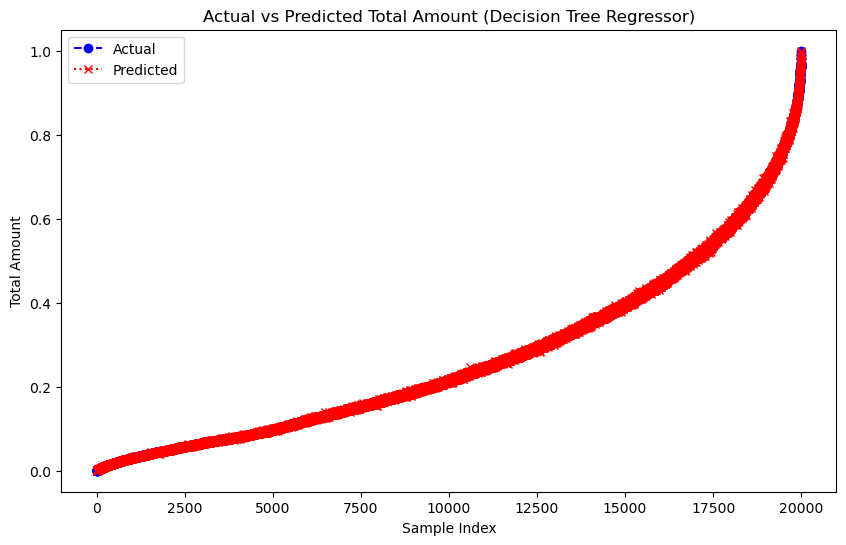

In [68]:
# Plot y_test and y_pred
plt.figure(figsize=(10, 6))

# Sort the values for better visualization
sorted_idx = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = np.array(y_pred)[sorted_idx]

plt.plot(y_test_sorted, label='Actual', color='blue', marker='o', linestyle='dashed')
plt.plot(y_pred_sorted, label='Predicted', color='red', marker='x', linestyle='dotted')

plt.xlabel('Sample Index')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Total Amount (Decision Tree Regressor)')
plt.legend()
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [38]:
categorical_cols = ['PaymentMethod','ProductCategory','ProductID','Quantity']

# Perform one-hot encoding
df_encoded1 = pd.get_dummies(df, columns=categorical_cols)

In [39]:
numeric_cols = ['Price','DiscountApplied(%)','TotalAmount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric columns
df_encoded1[numeric_cols] = scaler.fit_transform(df_encoded1[numeric_cols])

In [40]:
df_encoded1.drop(['CustomerID','State','StoreLocation','TransactionDate', 'Day', 'Week', 'Time of Day'], axis=1,inplace=True)

In [41]:
# Identify the boolean columns
bool_cols = df_encoded1.select_dtypes(include='bool').columns

# Convert boolean columns to 0 and 1
df_encoded1[bool_cols] = df_encoded1[bool_cols].astype(int)
df_encoded1

,Price,DiscountApplied(%),TotalAmount,Year,Month,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal,ProductCategory_Books,...,ProductID_D,Quantity_1,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9
0,0.778670,0.933874,0.504116,2023,12,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.724396,0.706082,0.281610,2023,8,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.239207,0.797201,0.229472,2024,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.987566,0.334322,0.510290,2023,10,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0.924324,0.201507,0.695775,2023,12,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.511982,0.917276,0.093828,2023,7,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,0.872411,0.199779,0.564954,2023,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,0.693177,0.871217,0.259969,2023,8,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0.628250,0.717265,0.311656,2024,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Ensure the year and month are valid for datetime creation
df_encoded1['Year'] = df_encoded1['Year'].astype(int)
df_encoded1['Month'] = df_encoded1['Month'].astype(int)

# Create the Date column
df_encoded1['Date'] = pd.to_datetime(df_encoded1[['Year', 'Month']].assign(Day=1))

# Aggregate by month
df_arima = df_encoded1.groupby('Date')['TotalAmount'].sum().reset_index()
df_arima.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df_arima) * 0.8)
train, test = df_arima.iloc[:train_size], df_arima.iloc[train_size:]

# Fit the ARIMA model
model = sm.tsa.ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 78564.72737016989


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


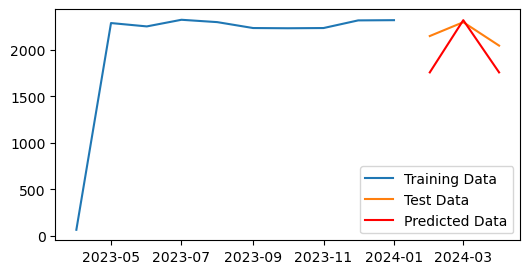

In [46]:
# Plot the results
plt.figure(figsize=(6, 3))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, predictions, label='Predicted Data', color='red')
plt.legend()
plt.show()